In [1]:
import cv2
import numpy as np
np.set_printoptions(threshold=np.nan)
from matplotlib import pyplot as plt
%matplotlib inline
from math import ceil
from math import pow
from math import sqrt
from copy import deepcopy

In [2]:
image = cv2.imread('gray2_encoded.jpg',cv2.IMREAD_GRAYSCALE)
image_dash = cv2.imread('gray2_encoded.jpg',cv2.IMREAD_GRAYSCALE)

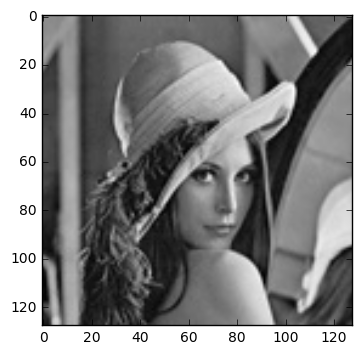

In [3]:
plt.imshow(image,cmap='gray')

In [4]:
x_checkpoint_pixels = []
y_checkpoint_pixels = []
number_of_blocks = 16
#Assuming the image to be square shaped
step_size = image_dash.shape[0]//int(sqrt(number_of_blocks))
for checkpoint in range(0,image_dash.shape[0],step_size):
    x_checkpoint_pixels.append(checkpoint)
    y_checkpoint_pixels.append(checkpoint)
x_checkpoint_pixels.append(image_dash.shape[0])
y_checkpoint_pixels.append(image_dash.shape[0])

print(x_checkpoint_pixels)

[0, 32, 64, 96, 128]


In [5]:
blockwise_pixels = []
for i in range(len(y_checkpoint_pixels)-1):
    for j in range(len(x_checkpoint_pixels)-1):
        blockwise_pixels.append(image_dash[x_checkpoint_pixels[j]:x_checkpoint_pixels[j+1],y_checkpoint_pixels[i]:y_checkpoint_pixels[i+1]])


In [6]:
pixels_of_block = []
for i in range(len(blockwise_pixels)):
    pixels_of_block.append(blockwise_pixels[i].flatten())

In [7]:
def binary_to_message(binary_message):#will be an eight bit value
    ascii_value = int(binary_message,2)
    return chr(ascii_value)

In [8]:
def reveal(px,block_no):
    card_px = len(px)
    #print(px)
    s=0
    #block_no = 1
    for i in range(card_px-1):
        #print(px[i],px[i+1])
        s = s + pow(abs(int(px[i])-int(px[i+1])),block_no)
    #print(s)
    s=s/(card_px-1)
    s=pow(s,1/block_no)
    #print(s)
    s=ceil(s)
    print('s = ',s)


    grf = {}

    for i in range(card_px):
        grf[i]=[]

    for i in range(card_px):
        for j in range(card_px):
            if(i==j):
                continue
            if(abs(int(px[i])-int(px[j]))<s):
                grf[i].append(j)

    #for i in range(card_px):
     #   print("Nodes Related to node",i,":",grf[i])
    
    grf_dash = deepcopy(grf)
    stop = False
    i=0
    while not stop :
        if(len(grf_dash[i])>0):
            j = min(grf_dash[i])
            del grf_dash[j]
            for k in grf_dash:
                if(j in grf_dash[k]):
                    grf_dash[k].remove(j)
        else:
            q=[]
            for k in grf_dash:
                if k > i:
                    q.append(k)
            if(len(q)>0):
                i_dash = min(q)
                if(i_dash == max(grf_dash.keys())):
                    stop = True
                else:
                    i = i_dash
            else:
                stop = True
    print('keys in grf_dash : ',grf_dash.keys())
    #print(grf)
    message = ''
    keys = list(grf_dash.keys())
    for i in keys[:4]:
        message+=bin(px[i])[-2:]
    return message

In [9]:
final_message = ''
finished = False
current_message_in_binary = ''
block_counter = 0
while(not finished):
    current_message_in_binary += reveal(pixels_of_block[block_counter],block_counter+1)
    print(current_message_in_binary)
    #current_message_in_aplhabet = binary_to_message(current_message_in_binary)
    #if(current_message_in_aplhabet == '#'):
    #    break
    #else:
    block_counter += 1
    if(block_counter == 16):
        finished = True
        #final_message += current_message_in_aplhabet
print(final_message)

s =  9
keys in grf_dash :  dict_keys([0, 6, 12, 14, 15, 16, 18, 31, 110, 304, 549, 991, 1023])
01111000
s =  26
keys in grf_dash :  dict_keys([0, 7, 8, 31, 107])
0111100001100001
s =  34
keys in grf_dash :  dict_keys([0, 8, 12, 121, 125])
011110000110000101011110
s =  46
keys in grf_dash :  dict_keys([0, 6, 8, 644])
01111000011000010101111001010100
s =  43
keys in grf_dash :  dict_keys([0, 405, 735])
01111000011000010101111001010100101000
s =  62
keys in grf_dash :  dict_keys([0, 1, 576, 888])
01111000011000010101111001010100101000001111b0
s =  72
keys in grf_dash :  dict_keys([0, 3, 246])
01111000011000010101111001010100101000001111b0011010
s =  66
keys in grf_dash :  dict_keys([0, 237, 300])
01111000011000010101111001010100101000001111b0011010100000
s =  97
keys in grf_dash :  dict_keys([0, 615, 959])
01111000011000010101111001010100101000001111b0011010100000010000
s =  88
keys in grf_dash :  dict_keys([0, 27])
01111000011000010101111001010100101000001111b00110101000000100000010
s = 

In [10]:
print(list(pixels_of_block[0]))

[137, 135, 135, 134, 133, 130, 127, 131, 131, 138, 142, 145, 146, 140, 116, 85, 63, 64, 72, 76, 75, 76, 76, 78, 78, 75, 78, 82, 86, 90, 91, 96, 134, 133, 133, 131, 130, 130, 126, 129, 127, 136, 143, 147, 147, 137, 113, 83, 60, 60, 68, 72, 73, 74, 73, 74, 73, 73, 78, 83, 87, 90, 90, 92, 131, 131, 131, 128, 129, 129, 126, 127, 130, 138, 143, 147, 145, 133, 108, 79, 57, 57, 64, 69, 71, 73, 71, 71, 70, 72, 78, 82, 86, 89, 89, 91, 131, 130, 131, 129, 129, 129, 127, 129, 139, 141, 142, 143, 141, 130, 106, 77, 58, 57, 63, 69, 72, 74, 72, 71, 69, 71, 77, 80, 84, 89, 90, 92, 130, 129, 131, 132, 131, 128, 127, 133, 141, 142, 140, 140, 138, 129, 108, 82, 60, 58, 64, 69, 72, 74, 72, 70, 69, 71, 77, 79, 83, 88, 90, 92, 129, 128, 131, 133, 132, 128, 128, 137, 141, 143, 141, 139, 136, 128, 109, 84, 60, 58, 64, 69, 72, 73, 70, 69, 70, 71, 76, 80, 83, 87, 87, 89, 130, 129, 131, 132, 133, 132, 132, 141, 142, 143, 139, 136, 135, 129, 108, 80, 58, 57, 63, 69, 71, 73, 71, 70, 70, 70, 75, 80, 84, 87, 87, 89